In [23]:
import pandas as pd
import numpy as np
from datetime import date
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore') 

>## EDA INVIERNO

In [32]:
df = pd.read_csv("../datos/bikes_eda.csv", index_col=0)
df

,instant,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,winter,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,winter,0,1,0,2,2,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,winter,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,winter,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,winter,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,winter,1,12,0,6,2,10.420847,11.33210,65.2917,23.458911,2114
726,727,2019-12-28,winter,1,12,0,7,2,10.386653,12.75230,59.0000,10.416557,3095
727,728,2019-12-29,winter,1,12,0,1,2,10.386653,12.12000,75.2917,8.333661,1341
728,729,2019-12-30,winter,1,12,0,2,1,10.489153,11.58500,48.3333,23.500518,1796


In [33]:
df_resp=df['cnt'].reset_index()


In [34]:
df=df.drop('cnt',axis=1)

In [35]:
df= df[df['season']=='winter']

df

,instant,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed
0,1,2018-01-01,winter,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882
1,2,2018-01-02,winter,0,1,0,2,2,14.902598,17.68695,69.6087,16.652113
2,3,2018-01-03,winter,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703
3,4,2018-01-04,winter,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832
4,5,2018-01-05,winter,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300
...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,winter,1,12,0,6,2,10.420847,11.33210,65.2917,23.458911
726,727,2019-12-28,winter,1,12,0,7,2,10.386653,12.75230,59.0000,10.416557
727,728,2019-12-29,winter,1,12,0,1,2,10.386653,12.12000,75.2917,8.333661
728,729,2019-12-30,winter,1,12,0,2,1,10.489153,11.58500,48.3333,23.500518


> EXPLICACIÓN DE LAS VARIABLES

- *instant*: índice.
  
- *dteday*: fecha datetime.
  
- *season*: estación del año(invierno).
  
- *yr*: año -> 0=2018, 1=2019.
  
- *mnth*: mes.
  
- *holiday*: vacaciones -> 1=vacaciones, 0=día de trabajo.
  
- *weekday*: día de la semana.
  
- *workingday*: día de trabajo -> 1=día de trabajo, 0=vacaciones.
  
- *weathersit*: clima de ese día(intensidad del 1 al 4, teniendo en cuenta las precipitaciones. El 1 es pocas nubes y el 4 es tormenta considerable).
  
- *temp*: temperatura del día.
  
- *atemp*: sensación térmica.
  
- *hum*: humedad.
  
- *windspeed*: velocidad del viento.
  
- *casual*: clientes esporádicos del servicio.
  
- *registered*: clientes ya registrados en el servicio (tarifa plana).
  
- *cnt*: número de bicicletas usadas ese día.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     180 non-null    int64  
 1   dteday      180 non-null    object 
 2   season      180 non-null    object 
 3   yr          180 non-null    int64  
 4   mnth        180 non-null    int64  
 5   holiday     180 non-null    int64  
 6   weekday     180 non-null    int64  
 7   weathersit  180 non-null    int64  
 8   temp        180 non-null    float64
 9   atemp       180 non-null    float64
 10  hum         180 non-null    float64
 11  windspeed   180 non-null    float64
dtypes: float64(4), int64(6), object(2)
memory usage: 18.3+ KB


In [37]:
# Todas mis columnas son de tipo numérico, pero hago algunos cambios ya que tngo columnas que deben ser categorías.

df['dteday']=df['dteday'].astype('datetime64')

In [38]:
df.describe(include=np.number).T #Solamente tengo season como categorica, que la modificaré más adelante

,count,mean,std,min,25%,50%,75%,max
instant,180.0,261.611111,212.131544,1.000000,45.750000,365.500000,410.250000,730.000000
yr,180.0,0.500000,0.501395,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,180.0,3.100000,3.412268,1.000000,1.000000,2.000000,3.000000,12.000000
holiday,180.0,0.044444,0.206655,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,180.0,3.950000,2.025742,1.000000,2.000000,4.000000,6.000000,7.000000
weathersit,180.0,1.405556,0.535836,1.000000,1.000000,1.000000,2.000000,3.000000
temp,180.0,12.197035,4.221457,2.424346,9.114700,11.706525,14.849124,23.472500
atemp,180.0,14.831376,4.961332,3.953480,11.608738,14.125325,17.985650,27.430850
hum,180.0,58.167024,15.139273,0.000000,48.322900,54.375000,69.339675,94.826100
windspeed,180.0,14.387168,5.804831,3.042356,10.386993,13.596545,17.088668,34.000021


In [39]:
df.isnull().sum()  #No hay nulos en ninguna columna

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
dtype: int64

> OUTLIERS

In [40]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 

    for col in lista_columnas:
        Q1 = np.percentile(dataframe[col], 25)
        Q3 = np.percentile(dataframe[col], 75)
        
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0:
            dicc_indices[col] = (list(outliers_data.index))
        
    return dicc_indices 

In [41]:
numericas=df.select_dtypes(include='number')
numericas=list(numericas.columns)

In [42]:
ind=detectar_outliers(numericas, df)

In [43]:
outliers=list(ind.values())
outliers

[[354,
  355,
  356,
  357,
  358,
  359,
  360,
  361,
  362,
  363,
  364,
  719,
  720,
  721,
  722,
  723,
  724,
  725,
  726,
  727,
  728,
  729],
 [0, 14, 49, 358, 365, 385, 413, 723],
 [437],
 [68],
 [44, 49, 382, 407, 420, 431, 432, 720]]

In [44]:
df[df['instant'].isin(outliers[0])]

,instant,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed
354,355,2018-12-21,winter,0,12,0,5,2,17.561653,21.40085,85.8333,14.833800
355,356,2018-12-22,winter,0,12,0,6,2,17.356653,21.30605,75.7500,3.167425
356,357,2018-12-23,winter,0,12,0,7,1,15.306653,18.87565,68.6250,18.374482
357,358,2018-12-24,winter,0,12,0,1,1,12.402500,14.96210,54.2500,12.750368
358,359,2018-12-25,winter,0,12,1,2,1,11.266103,13.99805,68.1304,10.391097
359,360,2018-12-26,winter,0,12,0,3,1,13.191299,15.77675,50.6957,16.044155
360,361,2018-12-27,winter,0,12,0,4,2,13.325000,16.38165,76.2500,12.626150
361,362,2018-12-28,winter,0,12,0,5,1,12.264330,13.99870,50.3913,19.695387
362,363,2018-12-29,winter,0,12,0,6,1,10.181653,13.19460,57.4167,8.000604
363,364,2018-12-30,winter,0,12,0,7,1,12.778347,15.94060,63.6667,9.000579


In [45]:
df[df['instant'].isin(outliers[1])]

,instant,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed
13,14,2018-01-14,winter,0,1,0,7,1,6.595670,9.42065,53.7826,8.478716
48,49,2018-02-18,winter,0,2,0,7,1,21.388347,25.59915,51.6667,17.749975
357,358,2018-12-24,winter,0,12,0,1,1,12.402500,14.96210,54.2500,12.750368
364,365,2018-12-31,winter,0,12,0,1,1,16.810000,20.70605,61.5833,14.750318
384,385,2019-01-20,winter,1,1,0,7,2,8.917500,11.04790,45.0000,13.584250
412,413,2019-02-17,winter,1,2,0,7,1,14.076653,17.58145,63.4583,13.791682
722,723,2019-12-24,winter,1,12,0,3,2,9.483464,12.94500,79.1304,5.174437


In [46]:
# Los outliers coinciden con el puente del pilar

In [47]:
numericas=df.select_dtypes(include=np.number)

In [48]:
numericas.columns

Index(['instant', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed'],
      dtype='object')

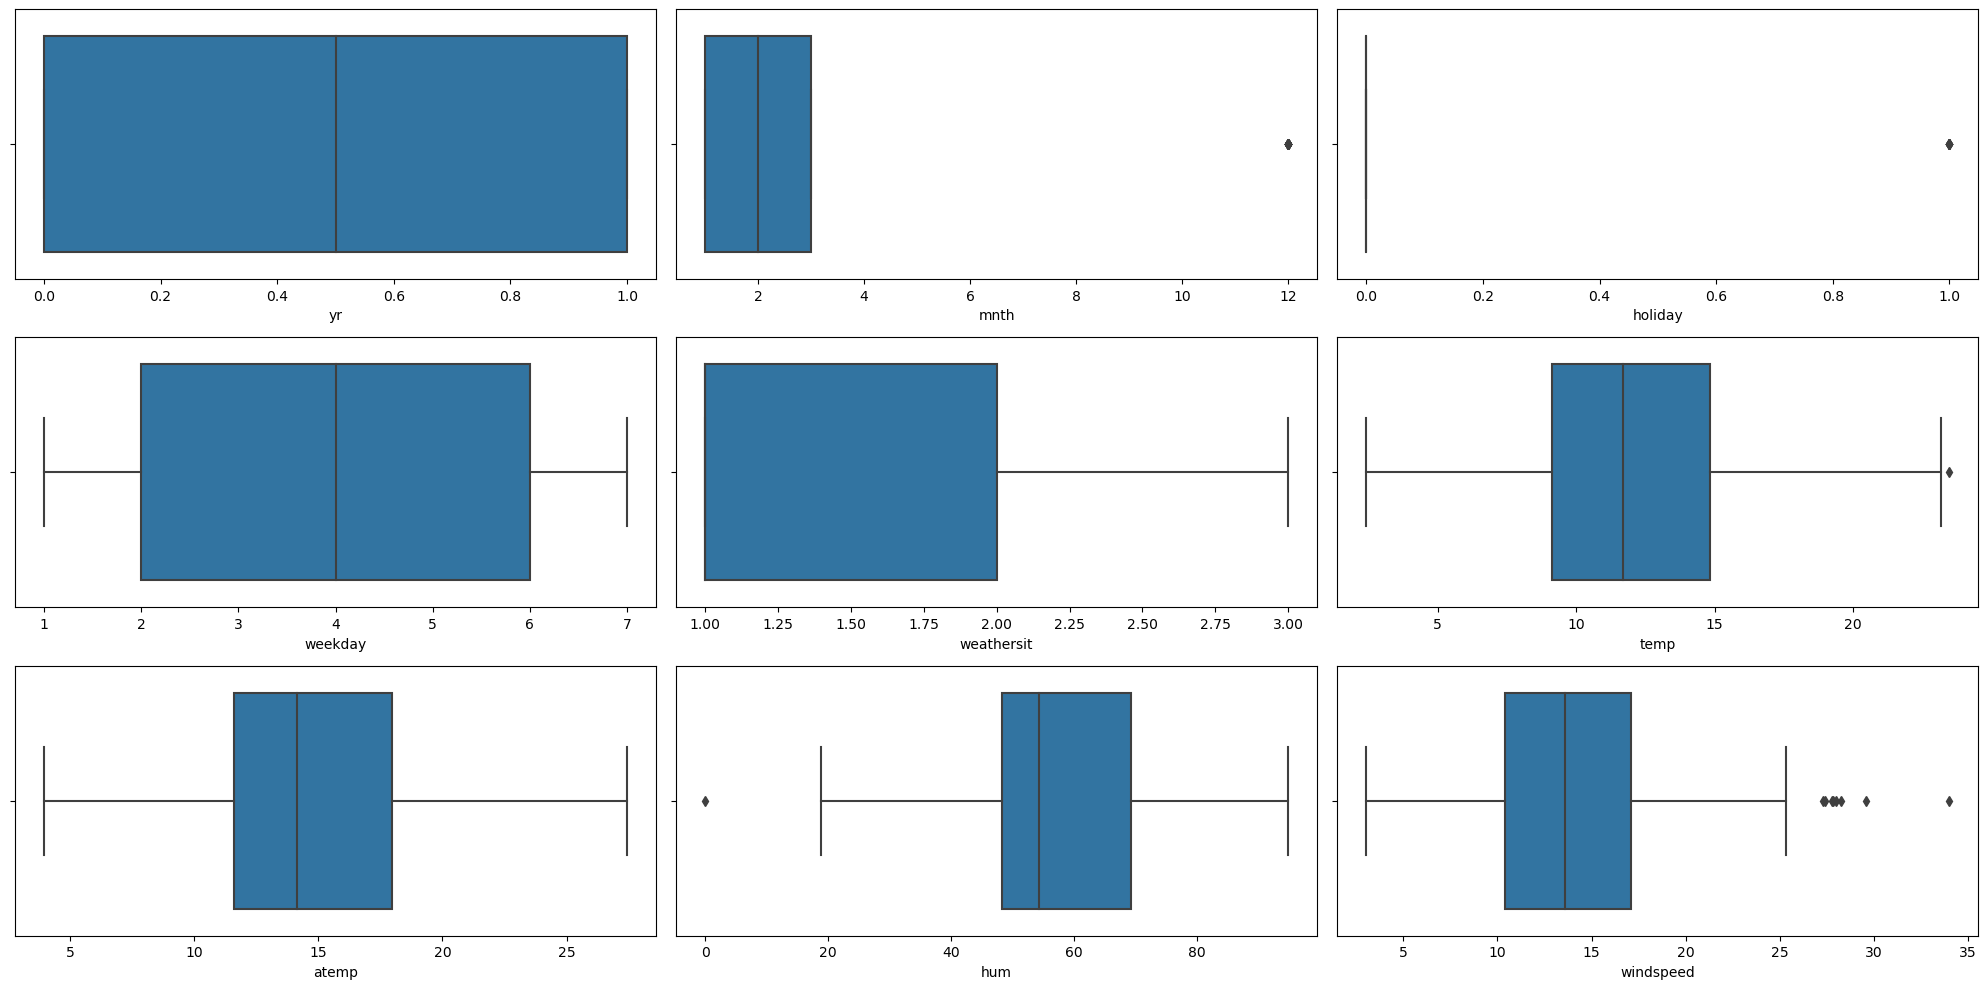

In [50]:
#BOXPLOT PARA LAS VARIABLES NUMÉRICAS


fig, axes= plt.subplots(3,3, figsize=(20,10))

axes=axes.flat

for i,column in enumerate(numericas.columns.drop(['instant'])):
    sns.boxplot(data=numericas, x=column, ax=axes[i])


plt.tight_layout()
plt.show();



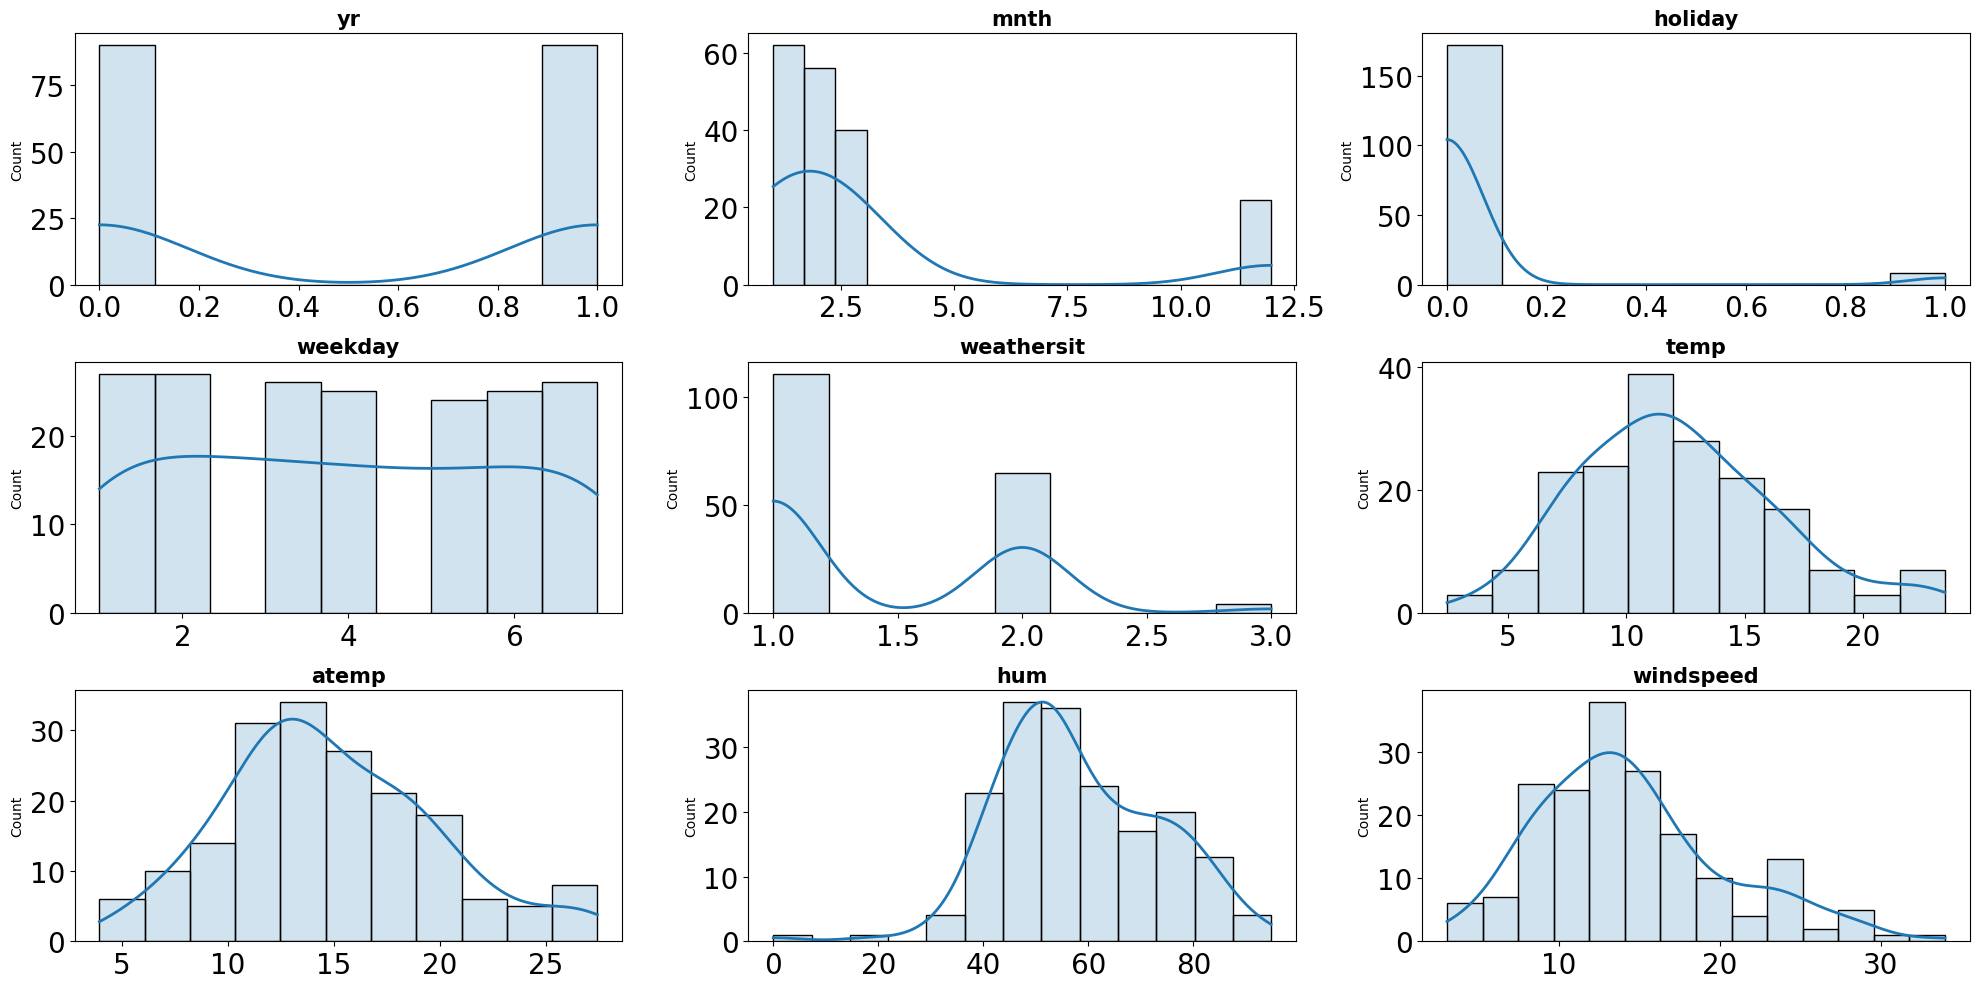

In [51]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 10))

axes = axes.flat

for i, colum in enumerate(numericas.columns.drop(['instant'])): 
    sns.histplot(
        data = numericas,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
 
plt.tight_layout()
plt.show();

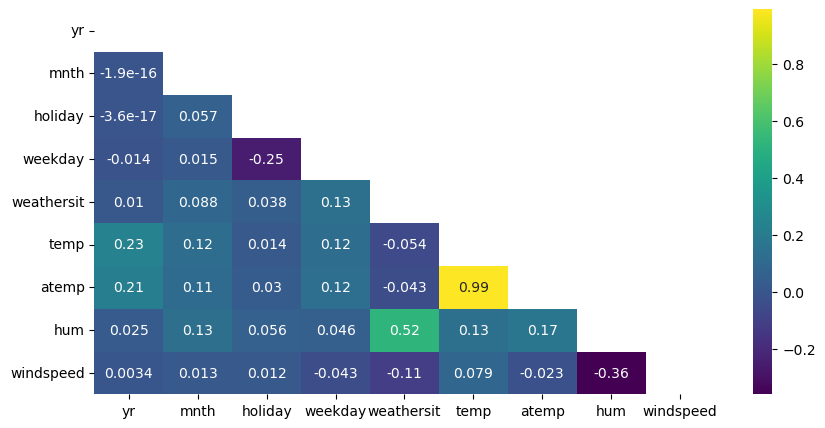

In [52]:
# Hacemos un heatmap con las variables numéricas contínuas
numeric = (df.select_dtypes(include = np.number)).drop(['instant'], axis=1)
correlacion = numeric.corr()
plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, cmap="viridis", annot = True, mask = mask); #barra lateral

In [53]:
#Elimino columnas que nos interfieren como ruido en la variable respuesta:
    #temp

In [55]:
df=df.drop(['temp'],axis=1)

In [56]:
df=df.reset_index()
df_resp=df_resp.reset_index()

In [57]:

df_merge=df.merge(df_resp, on='index')

In [58]:

df_merge=df_merge.drop('level_0',axis=1)

In [60]:

df_merge.to_csv('datos/bikes_winter_eda.csv')

>## NORMALIZACIÓN DE LA VARIABLE RESPUESTA

In [62]:
df=pd.read_csv('datos/bikes_winter_eda.csv')
df_resp=df['cnt'].reset_index()

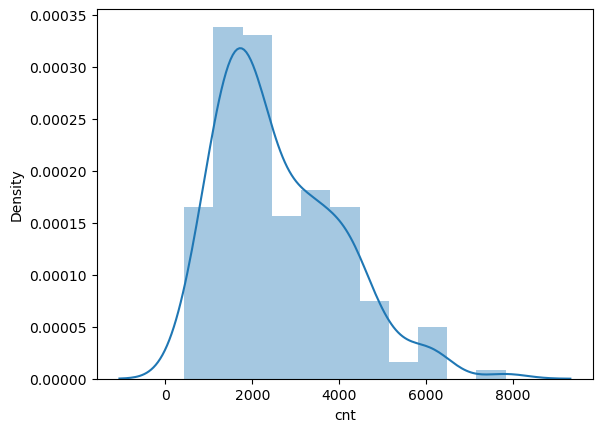

In [63]:
sns.distplot(df_resp["cnt"])
plt.show();

In [64]:
from scipy import stats

In [65]:
stats.shapiro(df_resp['cnt'])  #Mis datos no son normales


ShapiroResult(statistic=0.938895583152771, pvalue=6.223252739800955e-07)

In [66]:
#Normalizarlo

In [ ]:
from scipy import stats

In [67]:
df['cnt_BOX'],lambda_ajustada=stats.boxcox(df_resp['cnt'])
df.head()

,Unnamed: 0,index,instant,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,cnt,cnt_BOX
0,0,0,1,2018-01-01,winter,0,1,1,1,2,18.18125,80.5833,10.749882,985,18.047507
1,1,1,2,2018-01-02,winter,0,1,0,2,2,17.68695,69.6087,16.652113,801,16.952659
2,2,2,3,2018-01-03,winter,0,1,0,3,1,9.47025,43.7273,16.636703,1349,19.822839
3,3,3,4,2018-01-04,winter,0,1,0,4,1,10.60610,59.0435,10.739832,1562,20.698484
4,4,4,5,2018-01-05,winter,0,1,0,5,1,11.46350,43.6957,12.522300,1600,20.845083


In [68]:
stats.shapiro(df_resp['cnt'])  #Mis datos N0 son normales

ShapiroResult(statistic=0.938895583152771, pvalue=6.223252739800955e-07)

>## ESTANDARIZACIÓN DE LAS VARIABLES CATEGÓRICAS

In [70]:
df=pd.read_csv('datos/bikes_winter_eda.csv',index_col=0)
df_resp=df['cnt'].reset_index()
df=df.drop(['index','instant','cnt'], axis=1)
df

,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed
0,2018-01-01,winter,0,1,1,1,2,18.18125,80.5833,10.749882
1,2018-01-02,winter,0,1,0,2,2,17.68695,69.6087,16.652113
2,2018-01-03,winter,0,1,0,3,1,9.47025,43.7273,16.636703
3,2018-01-04,winter,0,1,0,4,1,10.60610,59.0435,10.739832
4,2018-01-05,winter,0,1,0,5,1,11.46350,43.6957,12.522300
...,...,...,...,...,...,...,...,...,...,...
175,2019-12-27,winter,1,12,0,6,2,11.33210,65.2917,23.458911
176,2019-12-28,winter,1,12,0,7,2,12.75230,59.0000,10.416557
177,2019-12-29,winter,1,12,0,1,2,12.12000,75.2917,8.333661
178,2019-12-30,winter,1,12,0,2,1,11.58500,48.3333,23.500518


In [71]:
df['dteday']=df['dteday'].astype('datetime64')

In [72]:
numericas=df.select_dtypes(include=np.number)

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler=StandardScaler()

In [75]:
scaler.fit(numericas)

StandardScaler()

In [76]:
X_estand=scaler.transform(numericas)

In [77]:
num_estand=pd.DataFrame(X_estand, columns=numericas.columns)
num_estand

,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed
0,-1.0,-0.617143,4.636809,-1.460318,1.112473,0.677080,1.484801,-0.628344
1,-1.0,-0.617143,-0.215666,-0.965295,1.112473,0.577171,0.757869,0.391271
2,-1.0,-0.617143,-0.215666,-0.470272,-0.758977,-1.083596,-0.956453,0.388609
3,-1.0,-0.617143,-0.215666,0.024751,-0.758977,-0.854017,0.058056,-0.630080
4,-1.0,-0.617143,-0.215666,0.519774,-0.758977,-0.680718,-0.958546,-0.322158
...,...,...,...,...,...,...,...,...
175,1.0,2.615511,-0.215666,1.014798,1.112473,-0.707277,0.471922,1.567151
176,1.0,2.615511,-0.215666,1.509821,1.112473,-0.420225,0.055174,-0.685926
177,1.0,2.615511,-0.215666,-1.460318,1.112473,-0.548026,1.134298,-1.045748
178,1.0,2.615511,-0.215666,-0.965295,-0.758977,-0.656161,-0.651363,1.574339


In [78]:
df=df.reset_index()
df_resp=df_resp.reset_index()
num_estand=num_estand.reset_index()

In [79]:
df_cat=df.select_dtypes(include=['object','category'])

In [80]:
df_concat=pd.concat([df_cat,num_estand,df_resp], axis=1)

In [81]:
df_concat

,season,index,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,level_0,index,cnt
0,winter,0,-1.0,-0.617143,4.636809,-1.460318,1.112473,0.677080,1.484801,-0.628344,0,0,985
1,winter,1,-1.0,-0.617143,-0.215666,-0.965295,1.112473,0.577171,0.757869,0.391271,1,1,801
2,winter,2,-1.0,-0.617143,-0.215666,-0.470272,-0.758977,-1.083596,-0.956453,0.388609,2,2,1349
3,winter,3,-1.0,-0.617143,-0.215666,0.024751,-0.758977,-0.854017,0.058056,-0.630080,3,3,1562
4,winter,4,-1.0,-0.617143,-0.215666,0.519774,-0.758977,-0.680718,-0.958546,-0.322158,4,4,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,winter,175,1.0,2.615511,-0.215666,1.014798,1.112473,-0.707277,0.471922,1.567151,175,175,2114
176,winter,176,1.0,2.615511,-0.215666,1.509821,1.112473,-0.420225,0.055174,-0.685926,176,176,3095
177,winter,177,1.0,2.615511,-0.215666,-1.460318,1.112473,-0.548026,1.134298,-1.045748,177,177,1341
178,winter,178,1.0,2.615511,-0.215666,-0.965295,-0.758977,-0.656161,-0.651363,1.574339,178,178,1796


In [82]:
df_concat=df_concat.drop(['level_0','index'],axis=1)

In [83]:
df_concat

,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,cnt
0,winter,-1.0,-0.617143,4.636809,-1.460318,1.112473,0.677080,1.484801,-0.628344,985
1,winter,-1.0,-0.617143,-0.215666,-0.965295,1.112473,0.577171,0.757869,0.391271,801
2,winter,-1.0,-0.617143,-0.215666,-0.470272,-0.758977,-1.083596,-0.956453,0.388609,1349
3,winter,-1.0,-0.617143,-0.215666,0.024751,-0.758977,-0.854017,0.058056,-0.630080,1562
4,winter,-1.0,-0.617143,-0.215666,0.519774,-0.758977,-0.680718,-0.958546,-0.322158,1600
...,...,...,...,...,...,...,...,...,...,...
175,winter,1.0,2.615511,-0.215666,1.014798,1.112473,-0.707277,0.471922,1.567151,2114
176,winter,1.0,2.615511,-0.215666,1.509821,1.112473,-0.420225,0.055174,-0.685926,3095
177,winter,1.0,2.615511,-0.215666,-1.460318,1.112473,-0.548026,1.134298,-1.045748,1341
178,winter,1.0,2.615511,-0.215666,-0.965295,-0.758977,-0.656161,-0.651363,1.574339,1796


In [84]:
df_concat.to_csv('datos/bikes_estand.csv')

>## ASUNCIONES

In [85]:
df=pd.read_csv('datos/bikes_estand.csv')
df_resp=df['cnt'].reset_index()
df=df.drop(['cnt','Unnamed: 0'],axis=1)
numericas=df.select_dtypes(include=np.number)

In [86]:
numericas.head()

,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed
0,-1.0,-0.617143,4.636809,-1.460318,1.112473,0.677080,1.484801,-0.628344
1,-1.0,-0.617143,-0.215666,-0.965295,1.112473,0.577171,0.757869,0.391271
2,-1.0,-0.617143,-0.215666,-0.470272,-0.758977,-1.083596,-0.956453,0.388609
3,-1.0,-0.617143,-0.215666,0.024751,-0.758977,-0.854017,0.058056,-0.630080
4,-1.0,-0.617143,-0.215666,0.519774,-0.758977,-0.680718,-0.958546,-0.322158


>Normalidad


In [87]:
for col in numericas:
    print(f'Para la columna {col} el resultado del test de Shapiro es: {stats.shapiro(numericas[col])}')

Para la columna yr el resultado del test de Shapiro es: ShapiroResult(statistic=0.6364224553108215, pvalue=2.1336584940937482e-19)
Para la columna mnth el resultado del test de Shapiro es: ShapiroResult(statistic=0.5658035278320312, pvalue=5.0002506612301495e-21)
Para la columna holiday el resultado del test de Shapiro es: ShapiroResult(statistic=0.2077304720878601, pvalue=4.451933822312858e-27)
Para la columna weekday el resultado del test de Shapiro es: ShapiroResult(statistic=0.9142937064170837, pvalue=9.399411027288807e-09)
Para la columna weathersit el resultado del test de Shapiro es: ShapiroResult(statistic=0.6622633934020996, pvalue=9.668869719174416e-19)
Para la columna atemp el resultado del test de Shapiro es: ShapiroResult(statistic=0.9808087944984436, pvalue=0.013976364396512508)
Para la columna hum el resultado del test de Shapiro es: ShapiroResult(statistic=0.9718397259712219, pvalue=0.0010506748221814632)
Para la columna windspeed el resultado del test de Shapiro es: Sh

>Independencia

In [88]:
import researchpy as rp

In [90]:
for col in numericas:
    crosstab,test_results, expected2= rp.crosstab(df_resp['cnt'],numericas[col],
                                test= "chi-square",
                                expected_freqs= True,
                                prop= "cell")
    print(f'Para la relación de la variable respuesta con la columna {col}, el resultado es {test_results}')

Para la relación de la variable respuesta con la columna yr, el resultado es                   Chi-square test   results
0  Pearson Chi-square ( 177.0) =   178.0000
1                      p-value =     0.4647
2                   Cramer's V =     0.9944
Para la relación de la variable respuesta con la columna mnth, el resultado es                   Chi-square test   results
0  Pearson Chi-square ( 531.0) =   530.7559
1                      p-value =     0.4948
2                   Cramer's V =     0.9914
Para la relación de la variable respuesta con la columna holiday, el resultado es                   Chi-square test   results
0  Pearson Chi-square ( 177.0) =   180.0000
1                      p-value =     0.4231
2                   Cramer's V =     1.0000
Para la relación de la variable respuesta con la columna weekday, el resultado es                    Chi-square test    results
0  Pearson Chi-square ( 1062.0) =   1065.8551
1                       p-value =      0.4610
2             

In [91]:
#Los datos de las variables independientes no son independientes con respecto a la variable respuesta.

>Homocedasticidad

In [92]:
df=pd.read_csv('datos/bikes_estand.csv')
df_resp=df['cnt'].reset_index()
df=df.drop(['Unnamed: 0'],axis=1)
numericas=df.select_dtypes(include=np.number)

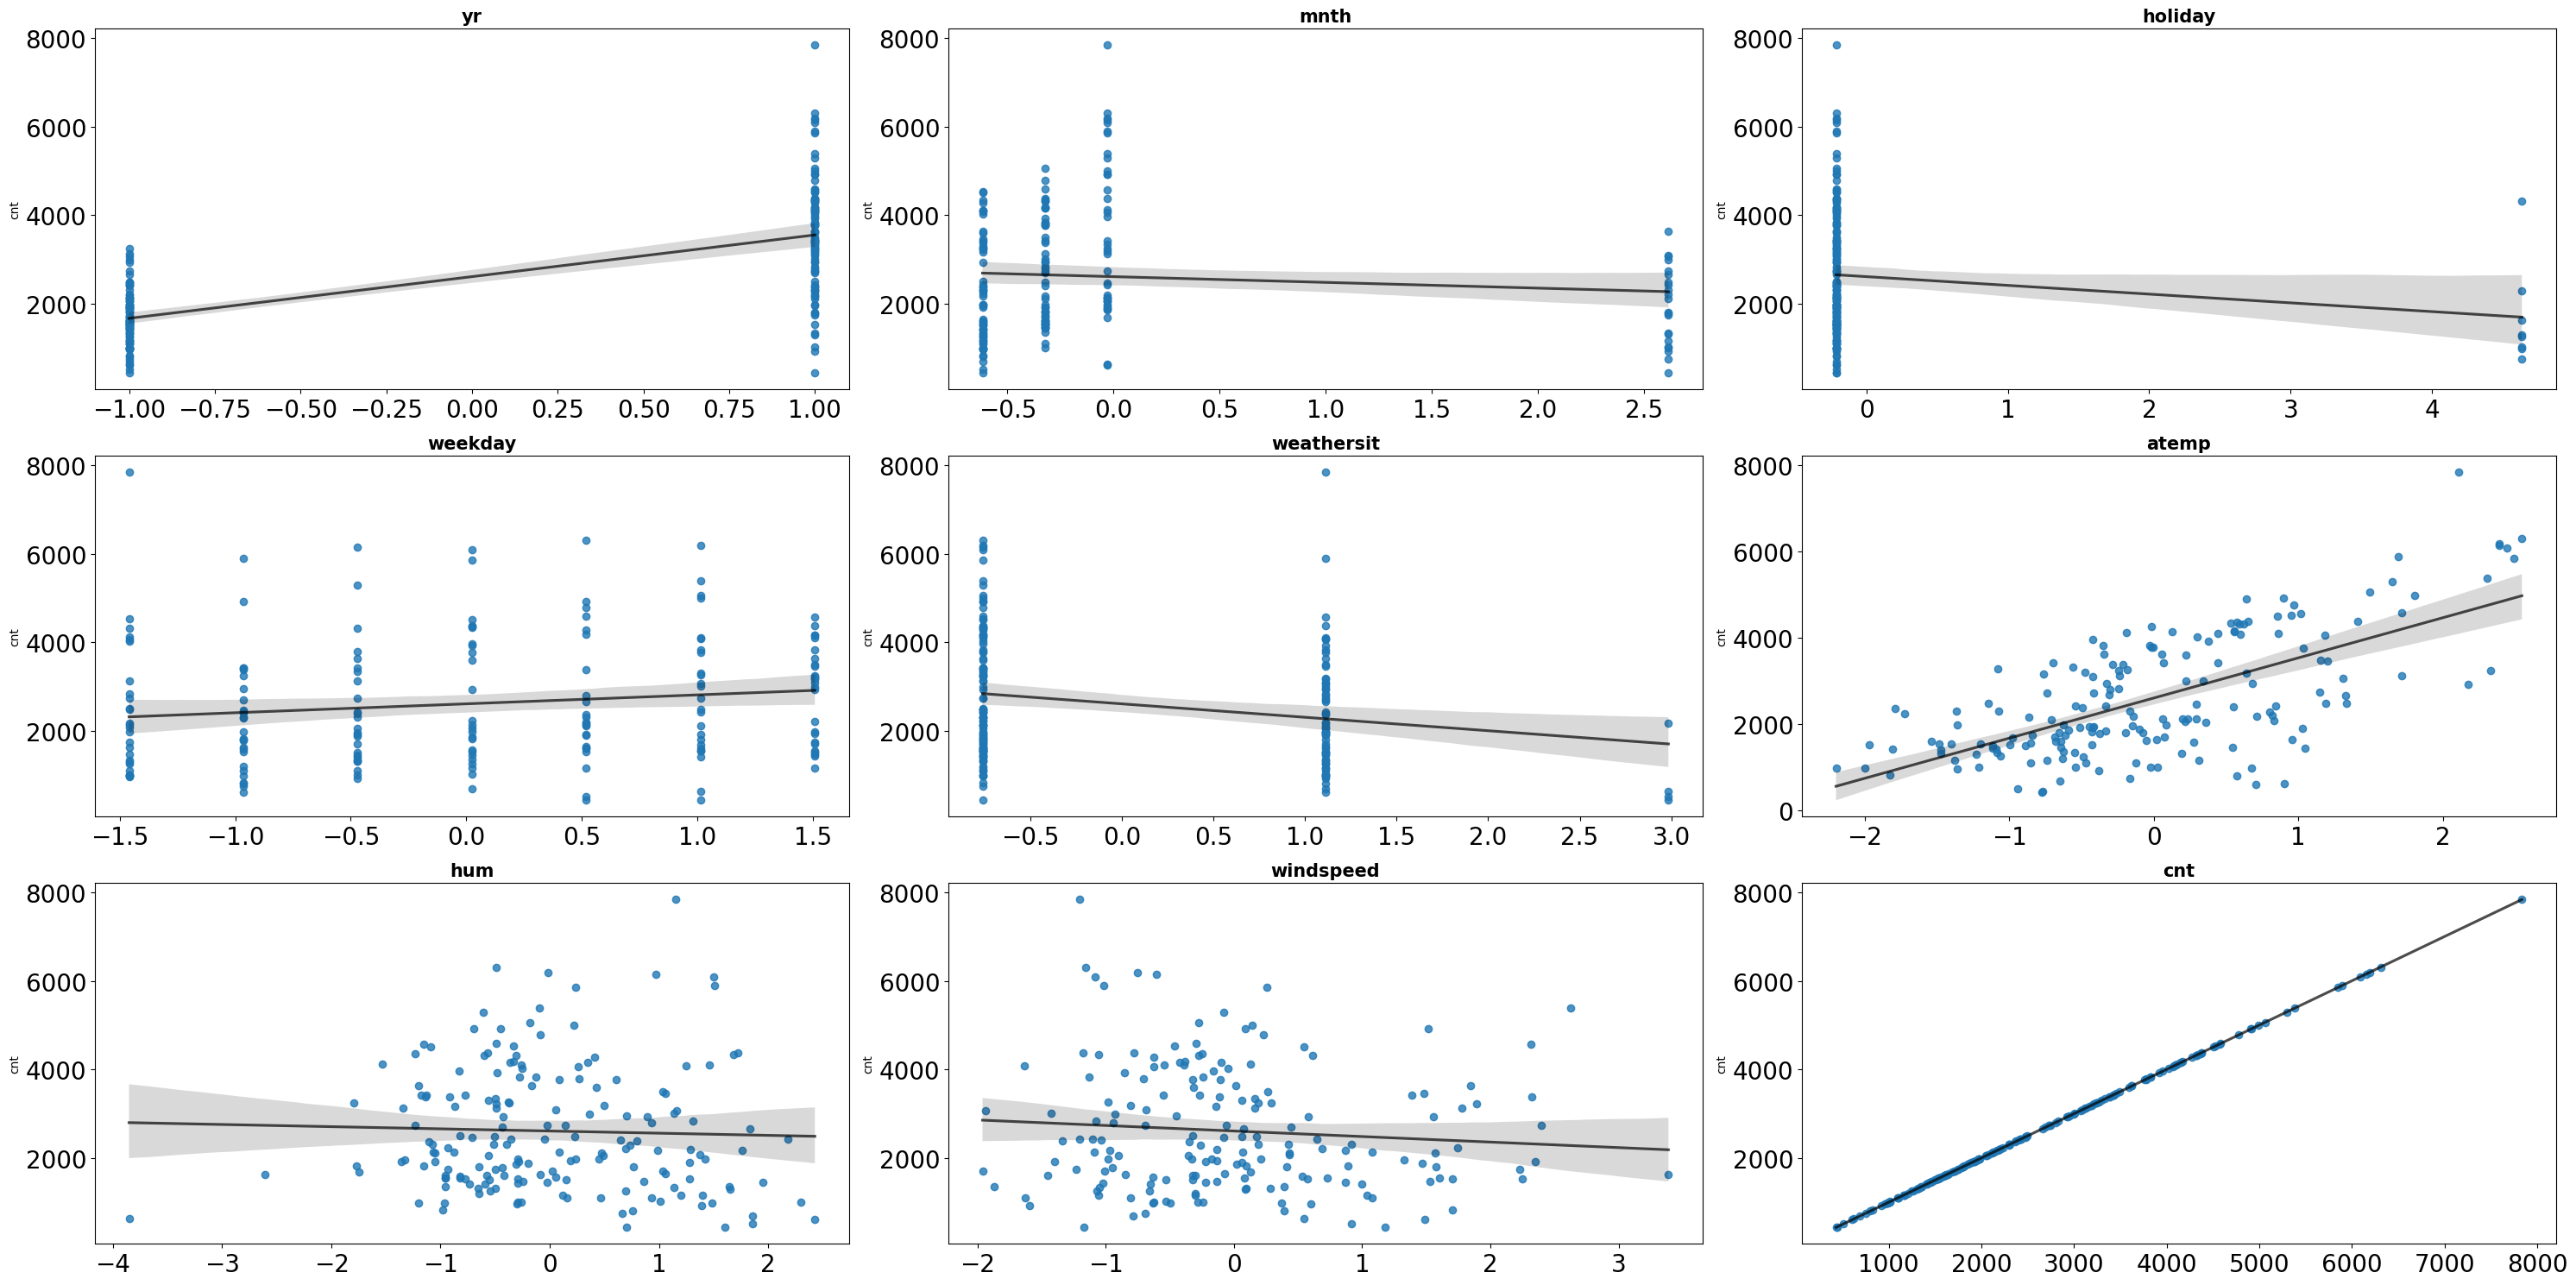

In [94]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (30, 15))

# definimos una lista de colores. Cada color corresponderá a una gráfica
lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(numericas.columns): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'cnt',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

In [95]:
# Tenemos algunas variables homocedásticas, pero no todas. Las variables casual y registered don las menos homocedásticas.

In [96]:
#Test de Levene para las variables independientes dicotómicas.

In [98]:
num_categ=df.select_dtypes(include=['number','category']).drop(['cnt'],axis=1).columns

In [99]:
from scipy.stats import levene

In [101]:
# creamos un diccionario para almacenar los resultados de los test
resultados = {}

#iteremos por la lista de las columnas numéricas
for col in num_categ:
    # calculamos el p-valor de test
    statistic, p_val = levene(df[col], df.cnt, center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val

In [102]:
resultados # Para las variables numéricas. Todas estas variables son homocedásticas con respecto a la variable respuesta

{'yr': 7.46613197940948e-44,
 'mnth': 7.00460061177302e-44,
 'holiday': 6.718192837958775e-44,
 'weekday': 7.32761298101909e-44,
 'weathersit': 7.228277241833319e-44,
 'atemp': 7.26096258885357e-44,
 'hum': 7.266791174011175e-44,
 'windspeed': 7.233484889743713e-44}

>## ENCODING

In [107]:
df=pd.read_csv('datos/bikes_estand.csv')
df_resp=df['cnt'].reset_index()
df=df.drop(['Unnamed: 0'],axis=1)
numericas=df.select_dtypes(include=np.number)

In [108]:
col_nuevas={'yr':'year','mnth':'month','cnt':'bike_count'}

In [109]:
df=df.rename(columns=col_nuevas)

In [110]:
df.head()

,season,year,month,holiday,weekday,weathersit,atemp,hum,windspeed,bike_count
0,winter,-1.0,-0.617143,4.636809,-1.460318,1.112473,0.677080,1.484801,-0.628344,985
1,winter,-1.0,-0.617143,-0.215666,-0.965295,1.112473,0.577171,0.757869,0.391271,801
2,winter,-1.0,-0.617143,-0.215666,-0.470272,-0.758977,-1.083596,-0.956453,0.388609,1349
3,winter,-1.0,-0.617143,-0.215666,0.024751,-0.758977,-0.854017,0.058056,-0.630080,1562
4,winter,-1.0,-0.617143,-0.215666,0.519774,-0.758977,-0.680718,-0.958546,-0.322158,1600


In [111]:
df.to_csv('datos/bikes_preparado.csv')